In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import KFold, cross_val_score

In [69]:
df, meta = pyreadstat.read_sav("C:/Users/susha/Downloads/statewise_cnns/Bihar_cnns.sav")
column_desc = meta.column_names_to_labels
var_value_desc = meta.variable_value_labels

In [12]:
pd.set_option('display.max_columns', 500)
print(df.head())

         caseid  state  area  psu_no  psu_no_ov  region  hh_no  int_d  int_m  \
0  1.010010e+10   10.0   1.0     1.0      576.0     3.0   13.0   21.0   11.0   
1  1.010010e+10   10.0   1.0     1.0      576.0     3.0   18.0   18.0   11.0   
2  1.010010e+10   10.0   1.0     1.0      576.0     3.0   31.0   19.0   11.0   
3  1.010010e+10   10.0   1.0     1.0      576.0     3.0   40.0   18.0   11.0   
4  1.010011e+10   10.0   1.0     1.0      576.0     3.0   62.0   18.0   11.0   

    int_y  q102  q103m   q103y  q104  q111m   q111y  q112  q113y  q113m  q114  \
0  2016.0   2.0    1.0  1997.0  19.0   98.0  9998.0  40.0    NaN    NaN   2.0   
1  2016.0   2.0    6.0  2006.0  10.0   98.0  9998.0  98.0    NaN    NaN   2.0   
2  2016.0   2.0    2.0  2001.0  15.0   98.0  9998.0  98.0    NaN    NaN   2.0   
3  2016.0   1.0    7.0  9998.0  10.0   98.0  9998.0  40.0    NaN    NaN   1.0   
4  2016.0   2.0    4.0  2000.0  16.0   98.0  1977.0  39.0    NaN    NaN   1.0   

    q115  q116  q117  q118  q125

In [13]:
column_desc

{'caseid': 'Unique ID of the child',
 'state': 'State',
 'area': 'Type of area',
 'psu_no': 'PSU(Unique within state)',
 'psu_no_ov': 'PSU(Unique within country)',
 'region': 'Regions of India',
 'hh_no': 'Household serial number',
 'int_d': ' Interview_day',
 'int_m': ' Interview_month',
 'int_y': ' Interview_year',
 'q102': 'q102: Sex of the respondent',
 'q103m': 'q103m: In what month you born',
 'q103y': 'q103y: In what year you born',
 'q104': "q104: Index child's age",
 'q111m': 'q111. In what month and year was your mother born?. month',
 'q111y': 'q111. In what month and year was your mother born?. year',
 'q112': 'q112. How old is your mother?',
 'q113y': "q113. How old were you at the time of mother's death? years",
 'q113m': "q113. How old were you at the time of mother's death? month",
 'q114': 'q114. What is your religion',
 'q115': 'q115: What is your caste or tribe',
 'q116': 'q116. Scheduled caste,scheduled tribe,other backward class,non-backward',
 'q117': 'q117. Did y

In [70]:
#repeating rows with state survey weight as frequency
df['state_weight_survey'] = df['state_weight_survey']*100
df.state_weight_survey = df.state_weight_survey.round()
df1 = df.loc[df.index.repeat(df.state_weight_survey)]
df1.reset_index(drop = True)
df1.head()

,caseid,state,area,psu_no,psu_no_ov,region,hh_no,int_d,int_m,int_y,q102,q103m,q103y,q104,q111m,q111y,q112,q113y,q113m,q114,q115,q116,q117,q118,q125,q201A,q201B,q201C,q201D,q201E,q201F,q201G,q201H,q201I,q201J,q201X,q201Y,q201o,q301,q302,q303,q304,q305,q305o,q306a,q306b,q306c,q306d,q306e,q306f,q306g,q306h,q306i,q306j,q306k,q306l,q306m,q306n,q306o,q306p,q306q,q901r1,q902r1,q902r2,q903r1,q903r2,q904r1,q904r2,q905r1,q905r2,q906r1,q906r2,height,muac,tsft,ssft,wc,agemons,z_wc,z_tsft,z_ssft,z_muac,@_cbmi,@_zwfa,@_zhfa,@_zbfa,@_fwfa,@_fhfa,@_fbfa,hgbn_alt_unic,crp1_dunic,creat_unic,fer_unic,vtb12c_unic,hydrov_unic,vitaa_unic,zns_unic,rbcf_1unic,glus_unic,hb_a1c_unic,cho_dunic,tri_dunic,dirldl_dunic2,chohdl_dunic,uiod_unic,bp_unic,bp_sys1,bp_dysys1,bp_sys2,bp_dysys2,bp_sys3,bp_dysys3,wi,wi_s,state_weight_survey,state_weight_bio,reg_weight_survey,reg_weight_bio,nat_weight_bio,nat_weight_survey,fasting_status
0,1.010010e+10,10.0,1.0,1.0,576.0,3.0,13.0,21.0,11.0,2016.0,2.0,1.0,1997.0,19.0,98.0,9998.0,40.0,NaN,NaN,2.0,991.0,3.0,2.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2.0,NaN,2.0,2.0,NaN,,7.0,8.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,129.0,NaN,1.770233,NaN,NaN,2.855158,
0,1.010010e+10,10.0,1.0,1.0,576.0,3.0,13.0,21.0,11.0,2016.0,2.0,1.0,1997.0,19.0,98.0,9998.0,40.0,NaN,NaN,2.0,991.0,3.0,2.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2.0,NaN,2.0,2.0,NaN,,7.0,8.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,129.0,NaN,1.770233,NaN,NaN,2.855158,
0,1.010010e+10,10.0,1.0,1.0,576.0,3.0,13.0,21.0,11.0,2016.0,2.0,1.0,1997.0,19.0,98.0,9998.0,40.0,NaN,NaN,2.0,991.0,3.0,2.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2.0,NaN,2.0,2.0,NaN,,7.0,8.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,129.0,NaN,1.770233,NaN,NaN,2.855158,
0,1.010010e+10,10.0,1.0,1.0,576.0,3.0,13.0,21.0,11.0,2016.0,2.0,1.0,1997.0,19.0,98.0,9998.0,40.0,NaN,NaN,2.0,991.0,3.0,2.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2.0,NaN,2.0,2.0,NaN,,7.0,8.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,129.0,NaN,1.770233,NaN,NaN,2.855158,
0,1.010010e+10,10.0,1.0,1.0,576.0,3.0,13.0,21.0,11.0,2016.0,2.0,1.0,1997.0,19.0,98.0,9998.0,40.0,NaN,NaN,2.0,991.0,3.0,2.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,2.0,NaN,2.0,2.0,NaN,,7.0,8.0,7.0,7.0,7.0,7.0,8.0,7.0,8.0,7.0,8.0,8.0,8.0,7.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,129.0,NaN,1.770233,NaN,NaN,2.855158,


In [71]:
df1.shape

(138030, 121)

## BMI of Child(age: 10-19) and eating habbits

In [110]:
data = df1[['q104', '@_cbmi', 'q306a', 'q306b', 'q306c', 'q306d', 'q306e', 'q306f', 'q306g', 'q306h', 'q306i','q306j','q306k','q306l','q306m','q306n','q306o','q306p','q306q']]

In [111]:
data.isna().sum()

q104         0
@_cbmi    4360
q306a        0
q306b        0
q306c        0
q306d        0
q306e        0
q306f        0
q306g        0
q306h        0
q306i        0
q306j        0
q306k        0
q306l        0
q306m        0
q306n        0
q306o        0
q306p        0
q306q        0
dtype: int64

In [112]:
data['q306a'] = data['q306a'].replace(8, 0.5)
data['q306a'] = data['q306a'].replace(9, 0)
data['q306b'] = data['q306b'].replace(8, 0.5)
data['q306b'] = data['q306b'].replace(9, 0)
data['q306c'] = data['q306c'].replace(8, 0.5)
data['q306c'] = data['q306c'].replace(9, 0)
data['q306d'] = data['q306d'].replace(8, 0.5)
data['q306d'] = data['q306d'].replace(9, 0)
data['q306e'] = data['q306e'].replace(8, 0.5)
data['q306e'] = data['q306e'].replace(9, 0)
data['q306f'] = data['q306f'].replace(9, 0)
data['q306f'] = data['q306f'].replace(8, 0.5)
data['q306g'] = data['q306g'].replace(9, 0)
data['q306g'] = data['q306g'].replace(8, 0.5)
data['q306h'] = data['q306h'].replace(9, 0)
data['q306h'] = data['q306h'].replace(8, 0.5)
data['q306i'] = data['q306i'].replace(9, 0)
data['q306i'] = data['q306i'].replace(8, 0.5)
data['q306j'] = data['q306j'].replace(9, 0)
data['q306j'] = data['q306j'].replace(8, 0.5)
data['q306k'] = data['q306k'].replace(9, 0)
data['q306k'] = data['q306k'].replace(8, 0.5)
data['q306l'] = data['q306l'].replace(9, 0)
data['q306l'] = data['q306l'].replace(8, 0.5)
data['q306m'] = data['q306m'].replace(9, 0)
data['q306m'] = data['q306m'].replace(8, 0.5)
data['q306n'] = data['q306n'].replace(9, 0)
data['q306n'] = data['q306n'].replace(8, 0.5)
data['q306o'] = data['q306o'].replace(9, 0)
data['q306o'] = data['q306o'].replace(8, 0.5)
data['q306p'] = data['q306p'].replace(9, 0)
data['q306p'] = data['q306p'].replace(8, 0.5)
data['q306q'] = data['q306q'].replace(9, 0)
data['q306q'] = data['q306q'].replace(8, 0.5)

C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q306a'] = data['q306a'].replace(8, 0.5)
C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q306a'] = data['q306a'].replace(9, 0)
C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q306p'] = data['q306p'].replace(9, 0)
C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['q306p'] = data['q306p'].replace(8, 0.5)
C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1123766293.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [113]:
data = data.dropna()
data.shape

(133670, 19)

In [114]:
data.rename(columns = {'q104': 'Age','q306a':'cereals','q306b':'milk', 'q306c':'pulses', 'q306d':'green vegetable', 'q306e':'roots', 'q306f':'other vegetable', 'q306g':'fruits', 'q306h':'eggs', 'q306i':'fish', 'q306j':'meat', 'q306k':'nuts an oilseed', 'q306l':'fats and oil', 'q306m':'sugar', 'q306n':'fried food', 'q306o':'junk food', 'q306p':'sweets', 'q306q':'aereted drinks' }, inplace = True)

C:\Users\susha\AppData\Local\Temp\ipykernel_20588\2190298027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'q104': 'Age','q306a':'cereals','q306b':'milk', 'q306c':'pulses', 'q306d':'green vegetable', 'q306e':'roots', 'q306f':'other vegetable', 'q306g':'fruits', 'q306h':'eggs', 'q306i':'fish', 'q306j':'meat', 'q306k':'nuts an oilseed', 'q306l':'fats and oil', 'q306m':'sugar', 'q306n':'fried food', 'q306o':'junk food', 'q306p':'sweets', 'q306q':'aereted drinks' }, inplace = True)


To do list:
1) OLS
2) KNN regression
3) univariate kernel density estimation
4) Kernel density regression??
5) Basic data exploration

In [115]:
data = data.reset_index(drop=True)

C:\Users\susha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='@_cbmi', ylabel='Density'>

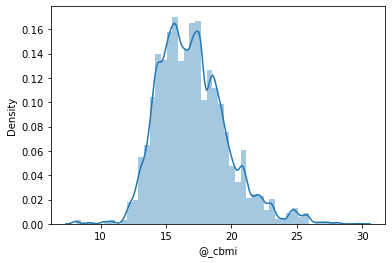

In [116]:
sns.distplot(data['@_cbmi'])

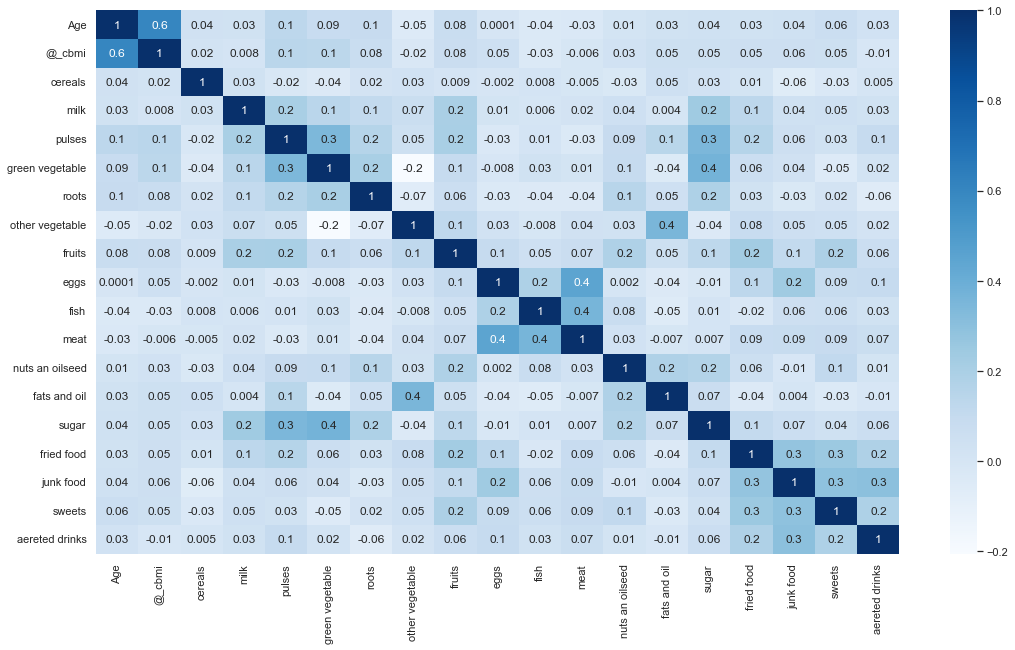

In [118]:
plt.figure(figsize=(18,10))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [119]:
data.corr()

,Age,@_cbmi,cereals,milk,pulses,green vegetable,roots,other vegetable,fruits,eggs,fish,meat,nuts an oilseed,fats and oil,sugar,fried food,junk food,sweets,aereted drinks
Age,1.000000,0.599597,0.035645,0.033949,0.132866,0.085661,0.095470,-0.050231,0.076687,0.000104,-0.035099,-0.030429,0.012051,0.033097,0.042726,0.031670,0.039852,0.063942,0.025252
@_cbmi,0.599597,1.000000,0.020508,0.008480,0.139063,0.137672,0.077909,-0.021738,0.076355,0.045667,-0.032890,-0.006092,0.026419,0.050464,0.049391,0.054210,0.056094,0.050355,-0.011121
cereals,0.035645,0.020508,1.000000,0.033301,-0.015606,-0.040005,0.019934,0.027551,0.008523,-0.001606,0.007577,-0.005485,-0.026248,0.046177,0.025226,0.014259,-0.062743,-0.031356,0.004776
milk,0.033949,0.008480,0.033301,1.000000,0.206171,0.139048,0.105094,0.069010,0.199664,0.011911,0.005921,0.016548,0.044450,0.003597,0.236881,0.130638,0.041141,0.045685,0.031204
pulses,0.132866,0.139063,-0.015606,0.206171,1.000000,0.340587,0.161409,0.052915,0.208147,-0.030124,0.009862,-0.034799,0.092202,0.144186,0.347735,0.160948,0.056695,0.031418,0.096904
green vegetable,0.085661,0.137672,-0.040005,0.139048,0.340587,1.000000,0.203890,-0.205994,0.098870,-0.008309,0.030715,0.014652,0.099426,-0.042387,0.369716,0.063810,0.037920,-0.048408,0.022443
roots,0.095470,0.077909,0.019934,0.105094,0.161409,0.203890,1.000000,-0.067694,0.064256,-0.034896,-0.038967,-0.038024,0.149969,0.045472,0.186809,0.030291,-0.026099,0.016728,-0.058916
other vegetable,-0.050231,-0.021738,0.027551,0.069010,0.052915,-0.205994,-0.067694,1.000000,0.120911,0.028078,-0.007865,0.037794,0.030803,0.351652,-0.037681,0.081887,0.054771,0.046261,0.017429
fruits,0.076687,0.076355,0.008523,0.199664,0.208147,0.098870,0.064256,0.120911,1.000000,0.099625,0.048243,0.072602,0.184520,0.051026,0.127981,0.228041,0.106327,0.189889,0.064940
eggs,0.000104,0.045667,-0.001606,0.011911,-0.030124,-0.008309,-0.034896,0.028078,0.099625,1.000000,0.187374,0.449805,0.001914,-0.038448,-0.014749,0.131521,0.238672,0.089867,0.096058


In [120]:
data.describe()

,Age,@_cbmi,cereals,milk,pulses,green vegetable,roots,other vegetable,fruits,eggs,fish,meat,nuts an oilseed,fats and oil,sugar,fried food,junk food,sweets,aereted drinks
count,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000,133670.000000
mean,14.244954,17.030082,6.973902,2.961136,4.305300,3.470285,4.694486,2.822511,0.989265,0.763862,0.807141,0.643828,0.784787,3.928290,4.203542,1.120513,0.523244,0.616803,0.531884
std,2.848559,2.644872,0.373961,3.011568,2.493543,2.651676,2.598243,2.561442,1.272850,0.984402,1.030931,0.653741,1.385247,3.221303,2.864744,1.413031,0.576760,0.601336,0.465928
min,10.000000,8.094890,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,15.150182,7.000000,0.500000,2.000000,1.000000,3.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
50%,14.000000,16.769724,7.000000,0.500000,4.000000,3.000000,6.000000,2.000000,0.500000,0.500000,0.500000,0.500000,0.500000,7.000000,5.000000,0.500000,0.500000,0.500000,0.500000
75%,17.000000,18.589182,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,0.500000,0.500000,1.000000,0.500000,0.500000,7.000000,7.000000,1.000000,0.500000,0.500000,0.500000
max,19.000000,29.848124,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [121]:
data['junk food'].value_counts()

0.5    108776
0.0     17964
1.0      3051
2.0      1931
3.0       759
4.0       578
7.0       386
6.0       225
Name: junk food, dtype: int64

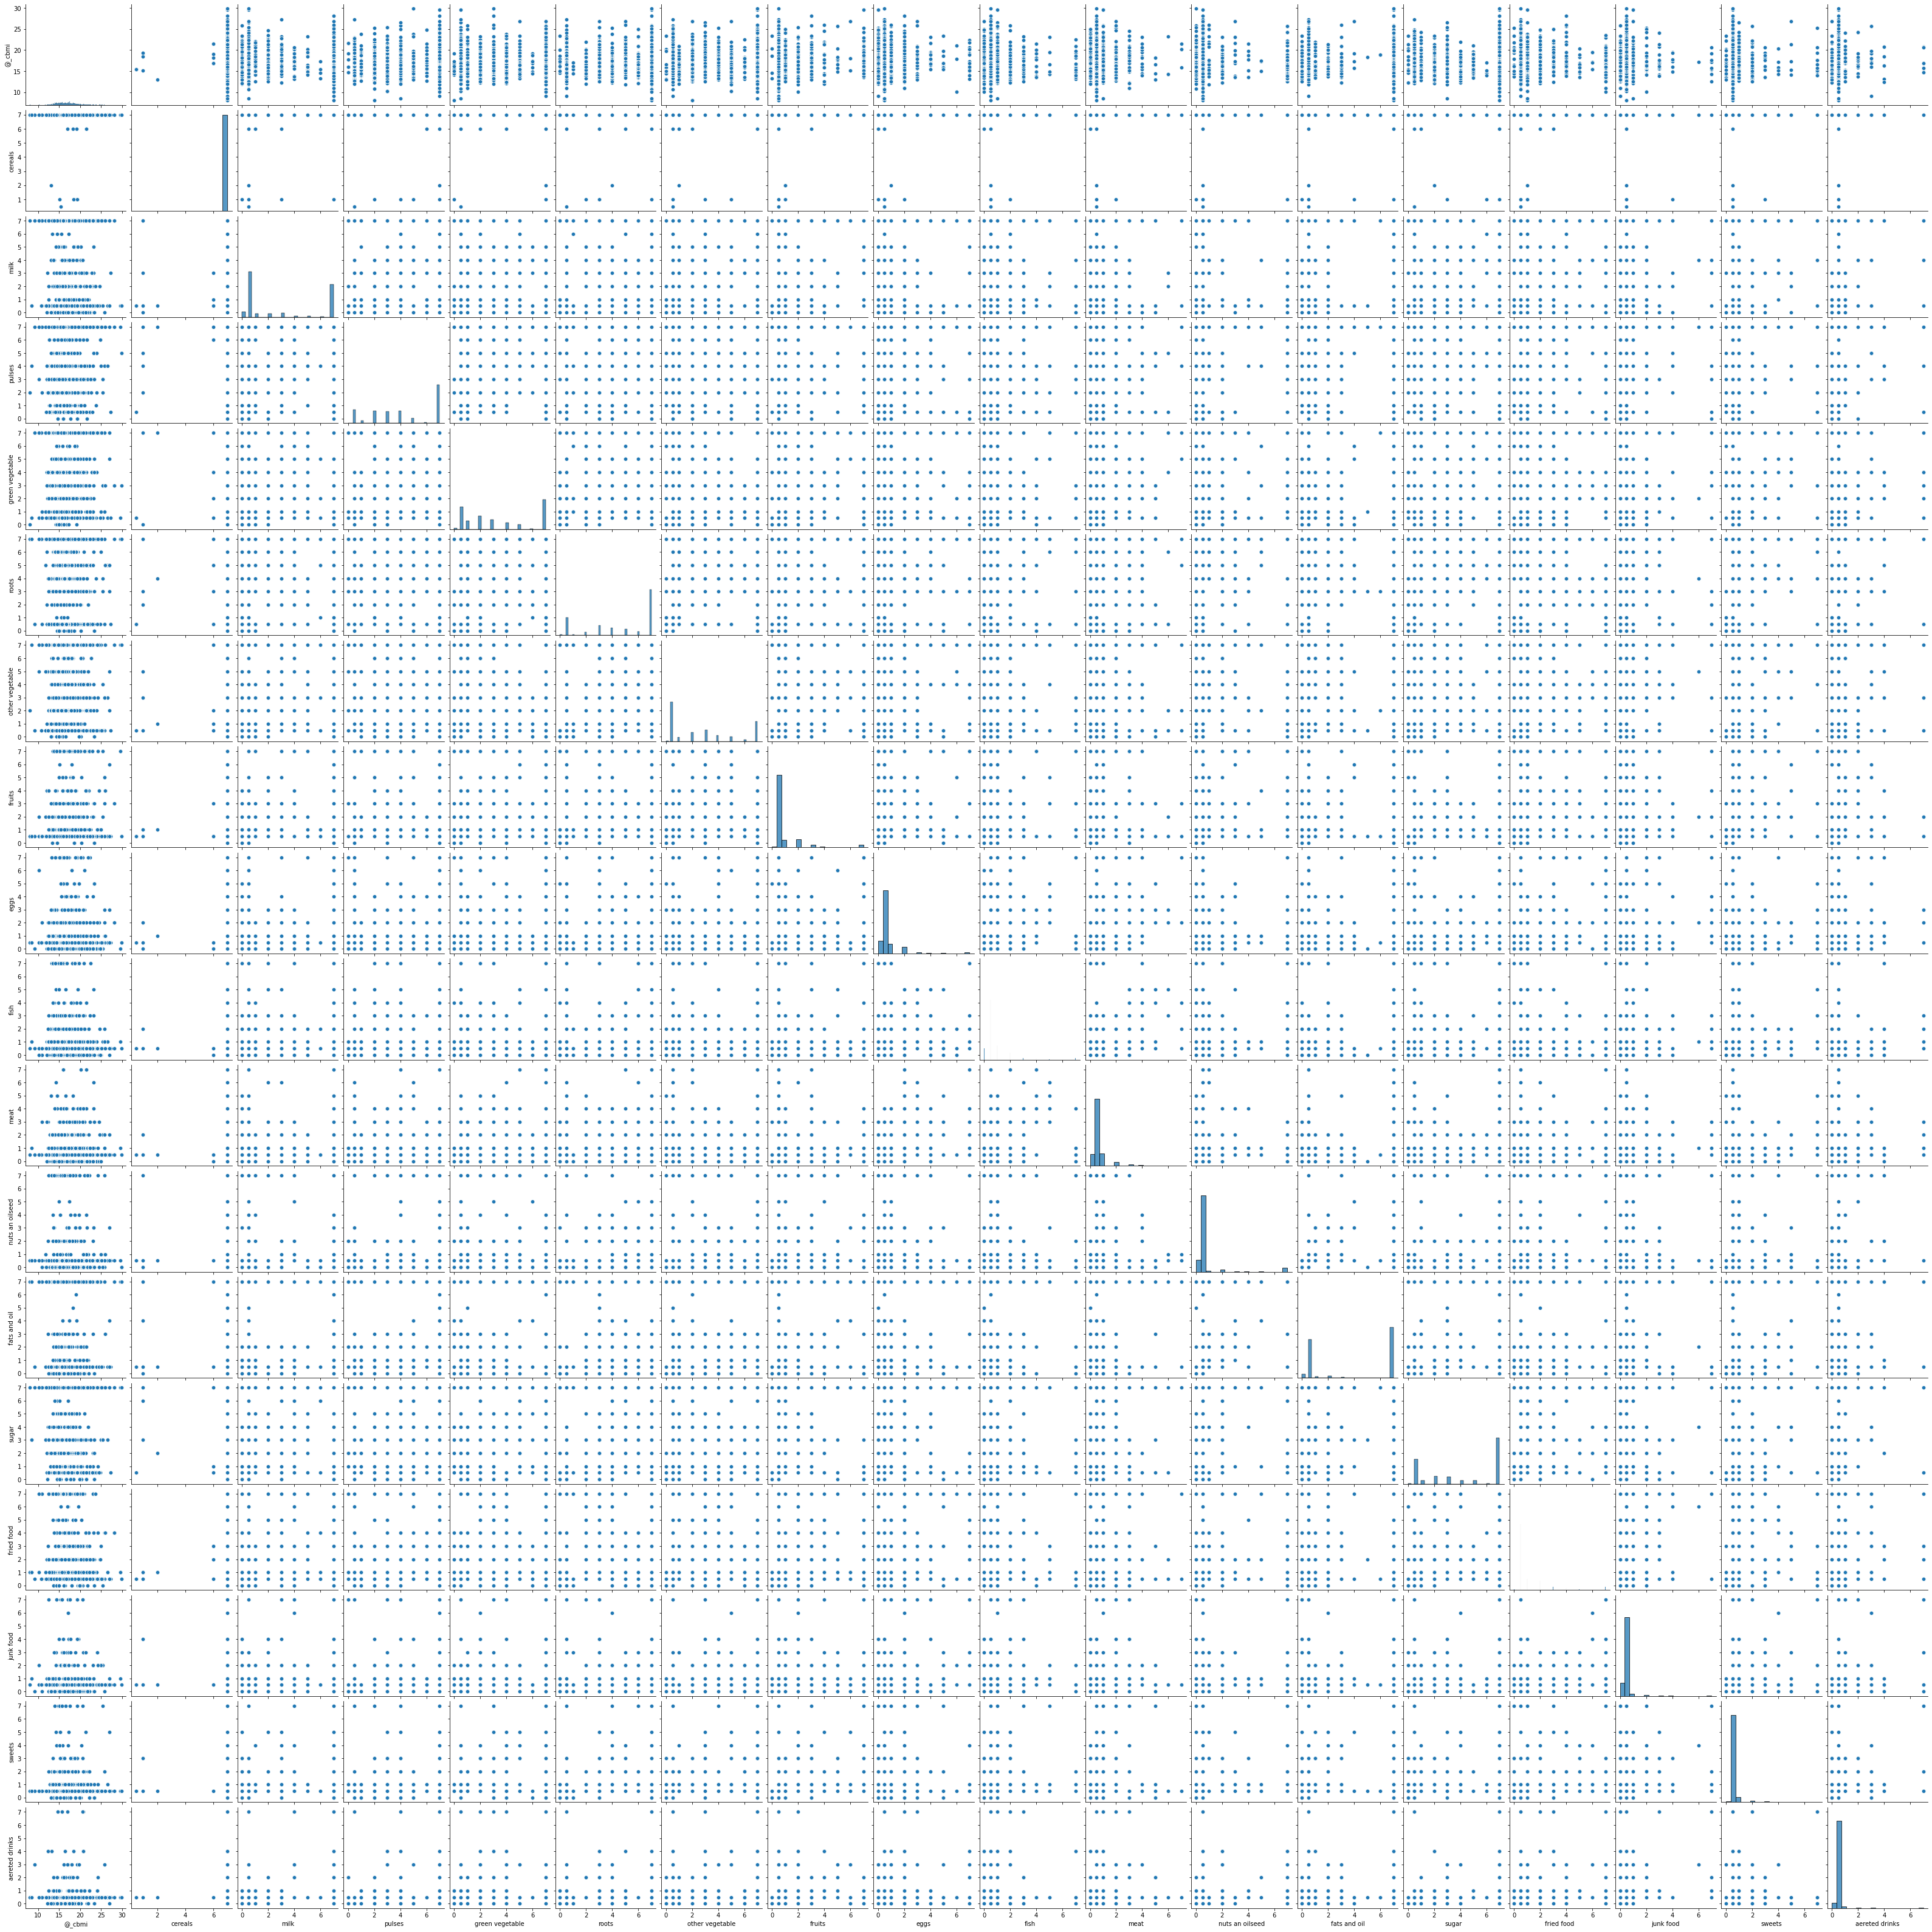

In [91]:
sns.pairplot(data)

In [151]:
data15 = data[data['Age']==15]
data15 = data15[['@_cbmi','cereals','milk', 'pulses','green vegetable', 'roots', 'other vegetable','fruits']]

<AxesSubplot:xlabel='sugar', ylabel='@_cbmi'>

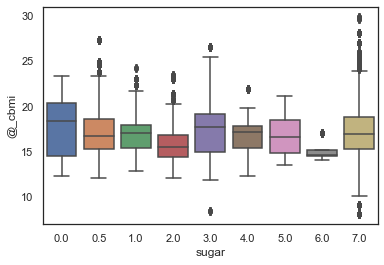

In [122]:
#for all age group
sns.boxplot(x = 'sugar', y = '@_cbmi', data = data)

<AxesSubplot:xlabel='sugar', ylabel='@_cbmi'>

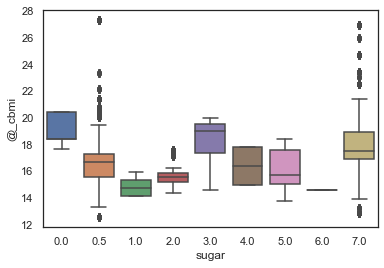

In [125]:
#for age group 15
sns.boxplot(x = 'sugar', y = '@_cbmi', data = data15)

<AxesSubplot:xlabel='milk', ylabel='@_cbmi'>

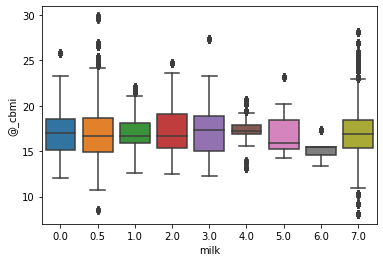

In [102]:
#For all age group
sns.boxplot(x = 'milk', y = '@_cbmi', data = data)

<AxesSubplot:xlabel='milk', ylabel='@_cbmi'>

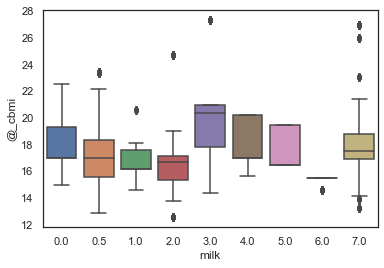

In [126]:
#for age group 15
sns.boxplot(x = 'milk', y = '@_cbmi', data = data15)

## KNN regression

In [133]:
data15.shape

(16609, 8)

In [176]:
Y = data15['@_cbmi']
X = data15.drop('@_cbmi', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [180]:
#the elbow method to pick a good K Value:
mse_val = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse = -1 * cross_val_score(knn, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
    mse_val.append(mse)

Text(0, 0.5, 'MSE')

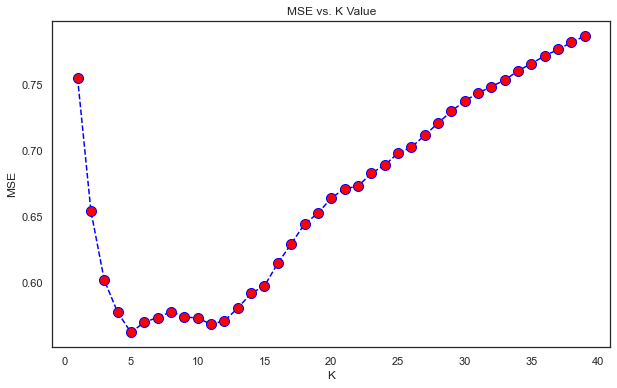

In [181]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),mse_val,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')

In [182]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  0.5976685628241847


## OLS

In [142]:
cereals = pd.get_dummies(data15['cereals'],drop_first=True)
milk = pd.get_dummies(data15['milk'],drop_first=True)
pulses = pd.get_dummies(data15['pulses'],drop_first=True)
green_vegetable = pd.get_dummies(data15['green vegetable'],drop_first=True)
roots = pd.get_dummies(data15['roots'],drop_first=True)
other_vegetable = pd.get_dummies(data15['other vegetable'],drop_first=True)
fruits = pd.get_dummies(data15['fruits'],drop_first=True)

In [143]:
data15.drop(['cereals','milk', 'pulses','green vegetable', 'roots', 'other vegetable','fruits'],axis=1,inplace=True)

In [144]:
data15 = pd.concat([data15,cereals,milk, pulses,green_vegetable, roots, other_vegetable,fruits],axis=1)

In [148]:
X = data15.drop('@_cbmi', axis=1)
Y = data15['@_cbmi']
X = sm.add_constant(X) #adding constant
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 @_cbmi   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:27:10   Log-Likelihood:                -26243.
No. Observations:               13287   AIC:                         5.258e+04
Df Residuals:                   13241   BIC:                         5.292e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6284      0.292     63.809      0.000      18.056      19.201
7.0           -0.8270      0.257     -3.218      0.001      -1.331      -0.323
0.5           -0.7044      0.090     -7.840      0.000      -0.880      -0.528
1.0           -0.6917      0.127     -5.457      0.000      -0.940      -0.443
2.0            0.7275      0.134      5.441      0.000       0.465       0.990
3.0            2.9322      0.130     22.513      0.000       2.677       3.187
4.0            2.0095      0.213      9.434      0.000       1.592       2.427
5.0           -1.0746      0.239     -4.488      0.000      -1.544      -0.605
6.0           -2.8911      0.184    -15.743      0.000      -3.251      -2.531
7.0           -0.1841      0.094     -1.962      0.050      -0.368      -0.000
1.0           -2.4295      0.125    -19.399      0.000      -2.675      -2.184
2.0           -1.8458      0.081    -22.702      0.000      -2.005      -1.686
3.0           -0.4309      0.079     -5.440      0.000      -0.586      -0.276
4.0           -0.4122      0.082     -5.008      0.000      -0.574      -0.251
5.0           -0.2584      0.109     -2.376      0.018      -0.472      -0.045
6.0           -0.4426      0.215     -2.055      0.040      -0.865      -0.020
7.0            0.2184      0.070      3.115      0.002       0.081       0.356
1.0           -0.1309      0.107     -1.227      0.220      -0.340       0.078
2.0           -0.7733      0.075    -10.317      0.000      -0.920      -0.626
3.0           -0.0704      0.064     -1.107      0.268      -0.195       0.054
4.0           -0.9171      0.119     -7.685      0.000      -1.151      -0.683
5.0            0.8380      0.096      8.719      0.000       0.650       1.026
6.0            0.3285      0.322      1.021      0.308      -0.302       0.959
7.0            0.7756      0.052     14.784      0.000       0.673       0.878
1.0            0.6872      0.139      4.952      0.000       0.415       0.959
2.0            0.1878      0.137      1.369      0.171      -0.081       0.457
3.0           -0.1605      0.102     -1.572      0.116      -0.361       0.040
4.0           -1.3445      0.096    -14.005      0.000      -1.533      -1.156
5.0           -0.9955      0.083    -12.046      0.000      -1.157      -0.833
6.0           -0.9082      0.127     -7.140      0.000      -1.158      -0.659
7.0           -0.3202      0.057     -5.650      0.000      -0.431      -0.209
0.5            0.4014      0.138      2.907      0.004       0.131       0.672
1.0           -2.4708      0.184    -13.411      0.000      -2.832      -2.110
2.0            1.4436      0.143     10.098      0.000       1.163       1.724
3.0            0.3937      0.153      2.571      0.010       0.094       0.694
4.0           -1.1309      0.158     -7.161      0.000      -1.440      -0.821
5.

In [149]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse) 

Mean squared error:  3.279730336532291


In [150]:
#Note: KNN performed better than simple OLS regression

## Kernel regression(local constant)

## kernel regression(NW)

In [155]:
#Nadaraya-Watson-Estimator
#re-run code for getting data15 as categorical value has been converted to dummies
X = data15.drop('@_cbmi', axis=1)
Y = data15['@_cbmi']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
kr = KernelReg(endog= y_train, exog= X_train , var_type='uuuuuuu',reg_type='lc')
y_pred,mar = kr.fit(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

KeyboardInterrupt: 

### Note: NW estimator is very inefficient for large dataset or where number of independent variables are greater in number

In [ ]:
#since i was unable to run the code for kernel regression(nw) for 7 number of independent variables tries reducing it


In [184]:
df2 = df[['@_cbmi','q306b', 'q306c', 'q306d']].dropna()
X = df2[['q306b', 'q306c', 'q306d']]
Y = df2['@_cbmi']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
kr = KernelReg(endog= y_train, exog= X_train , var_type='uuu',reg_type='lc')
y_pred,mar = kr.fit(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  8.77280823558454


## Univariate density using kernel density estimator

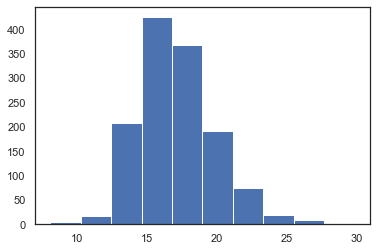

In [162]:
#Histogram for calculated bmi
plt.hist(df['@_cbmi'])
plt.show()

### Using uniform kernel

In [164]:
data15["@_cbmi"].describe()

count    16609.000000
mean        17.363558
std          2.325666
min         12.533837
25%         15.693621
50%         17.154490
75%         18.507452
max         27.334324
Name: @_cbmi, dtype: float64

In [165]:
#calculating optimal h
h_opt = 1.06*2.325666*(16609**(-0.2))
h_opt

0.35300797103678555

In [166]:
#defining code of uniform kernel
def uni_kernel(xi, x, h):
    z = (xi-x)/h
    if abs(z) < 1 or abs(z)==1:
        return(0.5)
    else:
        return(0)

In [167]:
x = df["@_cbmi"].dropna()
x = x.sort_values()

In [169]:
#calculating density of each point of x
f = list()
for i in range(0,len(x)):
    a = 0
    for j in range(0,len(x)):
        a = a + uni_kernel(x.iloc[j], x.iloc[i], h_opt)
    f.append(a/(len(x)*h_opt))

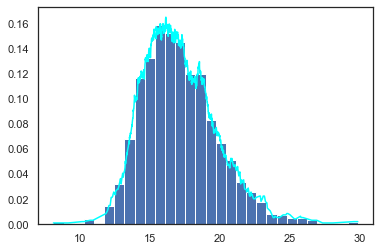

In [171]:
plt.plot(x,f, c='cyan')
plt.hist(x, 30, density=True, label='Data')
plt.show()

### python pakage for kernel density estimator(guassian)

C:\Users\susha\AppData\Local\Temp\ipykernel_20588\2707769423.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xx=x[:,np.newaxis]


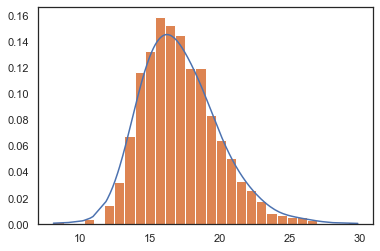

In [172]:
xx=x[:,np.newaxis]
model = KernelDensity()
model.fit(xx)
log_dens = model.score_samples(xx)

plt.plot(xx, np.exp(log_dens))
plt.hist(x, 30, density=True, label='Data')
plt.show()

### python pakage for kernel density estimator(epanechnikov)

C:\Users\susha\AppData\Local\Temp\ipykernel_20588\1264210064.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xx=x[:,np.newaxis]


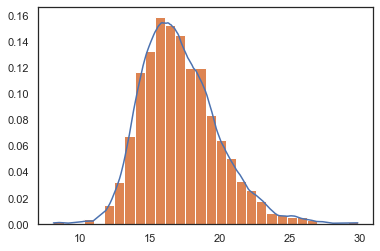

In [173]:
xx=x[:,np.newaxis]
model = KernelDensity(kernel = 'epanechnikov')
model.fit(xx)
log_dens = model.score_samples(xx)

plt.plot(xx, np.exp(log_dens))
plt.hist(x, 30, density=True, label='Data')
plt.show()

### using kernel density estimator code (epanechnikov)

In [174]:
def kernel_e(xi, x, h):
    z = (xi-x)/h
    if abs(z) < np.sqrt(5) or abs(z) == np.sqrt(5):
        k = (3/(4*np.sqrt(5)))*(1-0.2*(z**2))
        return(k)
    else:
        return(0)

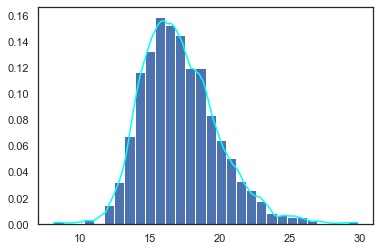

In [175]:
f = list()
for i in range(0,len(x)):
    a = 0
    for j in range(0,len(x)):
        a = a + kernel_e(x.iloc[j], x.iloc[i], h_opt)
    f.append(a/(len(x)*h_opt))
plt.plot(x,f, c='cyan')
plt.hist(x, 30, density=True, label='Data')
plt.show()